# Assignment: Data Quality Assessment & Preprocessing

In this assignment, we will apply Data Quality Assessment and Preprocessing techniques to an Electric Vehicle (EV) vs. Petrol dataset.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve the look of the plots
sns.set(style="whitegrid")

## Task 1: Identify data quality issues
First, we will load the dataset, check the Data Types, and look for any Missing Values.

In [15]:
# 1. Load Dataset
df = pd.read_csv("ev_vs_petrol_dataset_v3.csv")

# Show Data Types
print("--- Data Types ---")
print(df.dtypes)

# Check for Missing Values
print("\n--- Missing Values ---")
print(df.isna().sum())

# Display the first 5 rows
df.head()

--- Data Types ---
country                           object
region                            object
year                               int64
vehicle_segment                   object
powertrain_type                   object
ev_sales                           int64
petrol_car_sales                   int64
diesel_car_sales                   int64
total_vehicle_sales                int64
ev_market_share                  float64
charging_stations                  int64
fast_chargers_share              float64
avg_ev_range_km                    int64
fuel_price_usd_per_liter         float64
electricity_price_usd_per_kwh    float64
gdp_per_capita                     int64
urban_population_percent         float64
co2_emissions_transport_mt       float64
ev_subsidy_usd                     int64
emission_regulation_score        float64
ev_growth_rate_yoy               float64
is_ev_dominant                     int64
dtype: object

--- Missing Values ---
country                          0
region

,country,region,year,vehicle_segment,powertrain_type,ev_sales,petrol_car_sales,diesel_car_sales,total_vehicle_sales,ev_market_share,...,avg_ev_range_km,fuel_price_usd_per_liter,electricity_price_usd_per_kwh,gdp_per_capita,urban_population_percent,co2_emissions_transport_mt,ev_subsidy_usd,emission_regulation_score,ev_growth_rate_yoy,is_ev_dominant
0,Australia,Oceania,2010,commercial,ICE,5,92877,61921,154803,0.00,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
1,Australia,Oceania,2010,mass_market,ICE,57,535933,73089,609079,0.01,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
2,Australia,Oceania,2010,premium,ICE,37,235282,20462,255781,0.01,...,124,1.09,0.149,51977,88.8,88.7,0,30.4,0.00,0
3,Australia,Oceania,2011,commercial,ICE,11,98092,65395,163498,0.01,...,133,1.09,0.163,52807,88.9,88.3,0,30.8,120.00,0
4,Australia,Oceania,2011,mass_market,ICE,129,569679,77684,647492,0.02,...,133,1.09,0.163,52807,88.9,88.3,0,30.8,126.32,0


## Task 2: Apply one missing value strategy
Since our dataset has no missing values, we will introduce some artificial missing values in the `ev_sales` column for learning purposes.
Then, we will use the **Median Imputation** strategy to fill these gaps, because the median is more robust to outliers compared to the mean.

In [16]:
# Create a copy and add artificial missing values
df_missing = df.copy()
df_missing.loc[0:10, 'ev_sales'] = np.nan

print("Missing values before imputation:", df_missing['ev_sales'].isna().sum())

# Use Median to fill the missing values
df_missing['ev_sales'] = df_missing['ev_sales'].fillna(df_missing['ev_sales'].median())

print("Missing values after Median Imputation:", df_missing['ev_sales'].isna().sum())

Missing values before imputation: 11
Missing values after Median Imputation: 0


## Task 3: Detect and handle outliers using IQR
Outliers are extreme values that can negatively affect our models.
We will draw a Boxplot to visually detect them in the `ev_sales` column, then use the Interquartile Range (IQR) method to remove them.

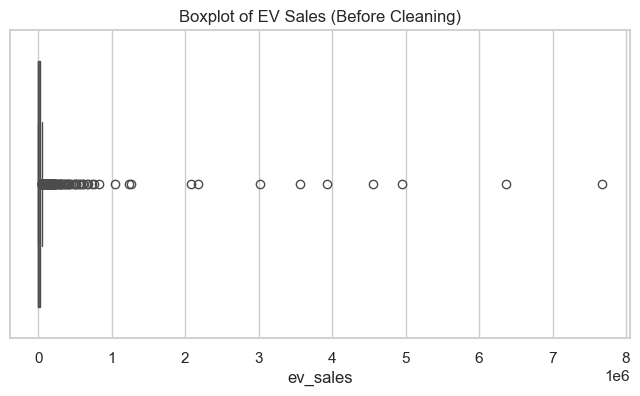

Original shape:  (1200, 22)
After removing outliers:  (1035, 22)


In [17]:
# Draw a Boxplot to detect outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ev_sales'])
plt.title("Boxplot of EV Sales (Before Cleaning)")
plt.show()

# Calculate IQR
Q1 = df['ev_sales'].quantile(0.25)
Q3 = df['ev_sales'].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['ev_sales'] >= lower) & (df['ev_sales'] <= upper)]

print("Original shape: ", df.shape)
print("After removing outliers: ", df_no_outliers.shape)

## Task 4: Normalize numerical features
Normalization aims to scale numbers so that no single feature dominates the others because of its size.
We will apply two methods:
1. **Min-Max Normalization**: Scales values between 0 and 1.
2. **Z-score Normalization (Standardization)**: Centers the mean to 0 and the standard deviation to 1.

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply Min-Max Normalization
scaler_minmax = MinMaxScaler()
df_minmax = df_no_outliers[['ev_sales', 'total_vehicle_sales']].copy()
df_minmax[['ev_sales', 'total_vehicle_sales']] = scaler_minmax.fit_transform(df_minmax)

print("--- Data after Min-Max Normalization ---")
display(df_minmax.head())

# Apply Z-Score Normalization
scaler_std = StandardScaler()
df_std = df_no_outliers[['ev_sales', 'total_vehicle_sales']].copy()
df_std[['ev_sales', 'total_vehicle_sales']] = scaler_std.fit_transform(df_std)

print("\n--- Data after Z-score Normalization ---")
display(df_std.head())

--- Data after Min-Max Normalization ---


,ev_sales,total_vehicle_sales
0,0.000000,0.010094
1,0.001063,0.043488
2,0.000654,0.017517
3,0.000123,0.010734
4,0.002534,0.046311



--- Data after Z-score Normalization ---


,ev_sales,total_vehicle_sales
0,-0.633086,-0.378100
1,-0.628454,0.012605
2,-0.630235,-0.291253
3,-0.632551,-0.370622
4,-0.622040,0.045642


## Task 5: Apply PCA and interpret explained variance
Before applying Principal Component Analysis (PCA), we will draw a Correlation Heatmap to check the relationship between features.
After that, we will apply PCA to reduce dimensions and print the Explained Variance Ratio to see how much information is retained.

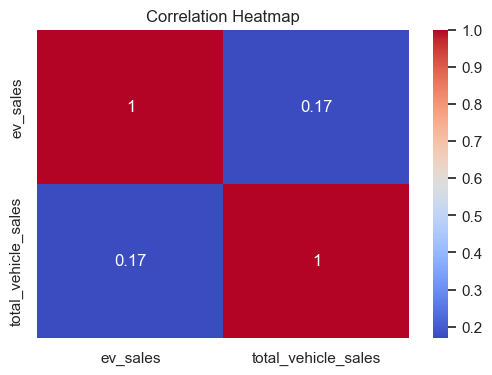

Explained Variance Ratio: [0.58529837 0.41470163]


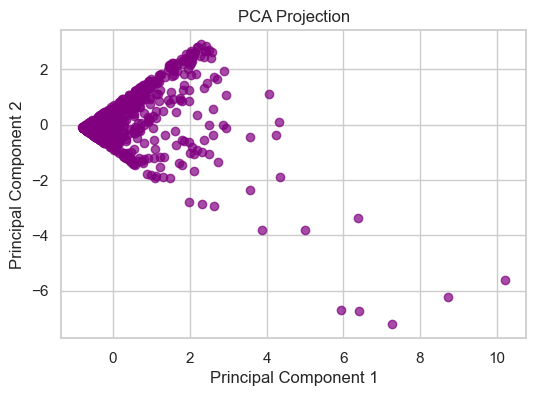

In [19]:
from sklearn.decomposition import PCA

# Draw a Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_std[['ev_sales', 'total_vehicle_sales']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_std[['ev_sales', 'total_vehicle_sales']])

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot PCA result
plt.figure(figsize=(6,4))
plt.scatter(principal_components[:,0], principal_components[:,1], alpha=0.7, color='purple')
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()